# Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import IsolationForest 
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', 100)

# Load Data
- inspection of data
    - .info()
    - .head()

In [2]:
path = 'Data/credit_card.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [3]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.254287,0.283266,0.919481,0.290123,-0.060268,0.119328,-0.068060,-0.065865,0.812108,-0.223647,0.769849,-1.298310,0.872823,0.708863,-0.148200,-0.013843,0.336903,-0.019875,-0.070028,0.030729,-0.057396,-0.158022,-0.030401,0.017295,0.085811,0.107121,0.006845,0.003067,64.520252
std,1.522637,1.314546,1.163288,1.427511,1.173778,1.299279,1.078250,1.255474,1.166215,1.099040,1.166212,1.523035,1.214494,1.241706,0.982085,0.882710,0.967641,0.794102,0.809517,0.595192,0.907699,0.631906,0.489834,0.591947,0.430758,0.556106,0.404949,0.267988,185.221202
min,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000
25%,-1.027537,-0.214263,0.424669,-0.589896,-0.645458,-0.633723,-0.535728,-0.192522,0.072521,-0.688422,-0.049507,-2.382661,0.011629,0.081149,-0.733039,-0.502403,-0.159532,-0.454213,-0.557802,-0.149775,-0.271001,-0.555175,-0.172704,-0.329963,-0.162928,-0.325964,-0.083980,-0.015625,5.380000
50%,-0.383856,0.292181,0.954225,0.235755,-0.156229,-0.160367,-0.052060,0.011440,0.815950,-0.340435,0.748672,-1.652614,0.949446,0.922855,-0.031137,0.062081,0.313472,0.017186,-0.084979,-0.020913,-0.128229,-0.145288,-0.044523,0.078389,0.118709,0.040788,-0.004320,0.016480,15.950000
75%,1.146465,0.913810,1.611713,1.138298,0.359786,0.489572,0.472143,0.264272,1.517105,0.170406,1.572927,0.065777,1.786078,1.499980,0.519083,0.537378,0.797031,0.445202,0.448598,0.160834,0.031776,0.238299,0.084179,0.407717,0.360469,0.467256,0.118735,0.078644,53.175000
max,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000


- Checking for duplicates
- .info() states no null values but will double check

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum().sum()

0

# Scale Data

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.predict(df)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,-1.133169,0.446834,-1.535047,-0.821518,1.645946,-0.517249,-0.133250,0.057508,0.585590,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472,0
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,0.722785,1.551943,-0.315973,-0.686699,0.798096,0.541269,-0.466837,-0.205886,-0.093585,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835,1
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,-0.124638,0.895884,-0.128068,-0.704557,2.539689,-3.258583,0.798958,-0.127804,-2.707713,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110,0
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,-0.854378,0.969520,-0.300606,-0.802796,-0.492057,-1.184825,-1.055192,2.500622,-1.436230,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445,0
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,-1.365765,1.205880,0.389505,-1.472671,0.329236,-0.495778,-0.593159,-0.023071,1.079111,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532,0


In [8]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_,columns = df.columns)
cluster_centers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.061196,0.053226,-0.050620,-0.094205,-0.118248,-0.244715,0.185121,-0.035698,-0.680309,0.108181,-0.470426,0.991857,-0.837266,-0.728206,0.421545,-0.217808,-0.483612,-0.180476,0.102618,0.041215,0.084629,0.142682,-0.045672,-0.095136,-0.013498,-0.189528,0.098632,0.013024,0.007409
1,0.032499,-0.008109,0.190288,0.151972,-0.140992,-0.145277,-0.054969,-0.042637,0.463768,-0.088042,0.344572,-0.593008,0.519816,0.460461,-0.310206,0.058864,0.345554,0.090055,-0.129566,-0.056608,-0.044251,-0.009889,0.028587,-0.125670,-0.042935,0.163101,-0.067390,-0.007712,-0.004050
2,0.062160,-0.223727,-1.324018,-0.762400,1.835461,2.565302,-0.552852,0.554719,-0.171603,0.147610,-0.319684,-0.449652,0.217675,0.118994,0.298567,0.699387,-0.255604,0.232045,0.527653,0.250390,-0.091785,-0.699499,0.009924,1.579702,0.435446,-0.333151,0.026162,-0.006537,-0.006551


In [9]:
distance = cdist(df,kmeans.cluster_centers_, 'euclidean')
distance.shape

(10000, 3)

In [10]:
df_scaled.shape

(10000, 30)

In [11]:
cluster_cols = [f'Distance (Cluster {c})' for c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distance,columns = cluster_cols)
distance_df.head()

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,149.669109,149.682082,149.759926
1,4.201178,3.993600,5.854572
2,378.703398,378.715755,378.747354
3,123.575656,123.587936,123.657890
4,70.089075,70.096353,70.266523


In [12]:
min_distances = np.min(distance,axis=1)
min_distances[:5]

array([149.6691088 ,   3.99359952, 378.70339776, 123.57565602,
        70.08907476])

In [13]:
threshold = np.percentile(min_distances,99.6)
threshold

1129.1630338588282

In [14]:
filter_anomalies = min_distances>threshold
filter_anomalies.sum()

40

In [15]:
idx_anomalies = df_scaled[filter_anomalies].index
idx_anomalies

Int64Index([  49,   87,  159,  857, 1019, 1271, 1376, 1412, 1619, 2156, 2363,
            2428, 2594, 2649, 3103, 3618, 3674, 4026, 4280, 4612, 4939, 5490,
            5517, 5538, 5581, 5811, 6643, 6829, 7096, 7322, 7338, 7453, 7470,
            7615, 7631, 8226, 8299, 8696, 9417, 9699],
           dtype='int64')

In [16]:
df_anomalies = df_scaled.iloc[idx_anomalies]
df_anomalies.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
49,-0.493013,-0.965586,-0.823156,2.395856,-5.599025,3.850617,4.117759,-1.546109,-0.935418,-0.006575,-0.535687,0.811023,-1.377110,-0.846313,-0.796641,0.594056,-0.252663,1.062711,1.557088,-0.054958,1.598410,-0.353946,2.041857,0.003632,1.126239,0.406700,2.100442,-0.293332,7.226477,0
87,-0.340877,-3.369600,-1.591705,-0.184266,-1.395597,0.262358,0.746993,-0.197824,-1.419003,0.219224,-1.189731,0.722808,0.594627,-0.780209,1.394273,1.516408,-0.223610,-1.547453,0.080247,4.052767,1.044864,0.291426,-2.254691,-1.135721,0.029194,-0.568752,-0.440951,0.764960,5.817658,0
159,-3.834960,-9.431468,-5.686284,2.104654,-1.153193,3.584223,4.522820,-0.129306,-1.147362,-1.366035,-0.971285,1.040386,-0.317010,0.443842,0.823397,0.531465,-0.862498,1.022771,-1.122225,12.960326,2.518824,-3.332963,-7.192555,2.023902,-1.141962,-1.367622,-1.773317,2.499616,20.320071,0
857,-1.008529,-4.655097,-2.056578,-0.799531,-2.022296,0.217121,1.319430,-0.177167,1.384703,-1.976055,-1.457452,1.209271,-0.830677,-0.334158,2.429101,-0.752463,-0.300478,0.822061,0.655618,5.184857,1.254664,-0.031986,-3.277833,-1.119997,0.062959,-1.499510,-0.473295,1.095982,8.306537,0
1019,-2.394993,-2.572603,-0.973934,-2.079637,-2.442925,0.474410,1.539174,-2.707931,0.858074,-3.039106,-1.485422,1.347785,-0.907445,-0.451678,1.034348,0.621367,-1.077039,0.493992,-0.678432,0.476394,-1.432787,0.095658,-8.145823,0.293878,-0.673971,-2.128911,2.632851,-0.714859,7.906508,0


# Isolation Forest

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
X=df.copy()
iso_004 = IsolationForest(contamination=0.004, random_state = 42)

iso_004.fit(X.values)

IsolationForest(contamination=0.004, random_state=42)

In [19]:
predictions = iso_004.predict(X.values)
predictions[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
predictions[predictions ==1] = 0
predictions[predictions ==-1] = 1

predictions[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
X['anomaly-iso_004'] = predictions
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly-iso_004
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
from scipy.stats import zscore
X['is_anomaly_std_iso'] = zscore(X['anomaly-iso_004']) < -3
X.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly-iso_004,is_anomaly_std_iso
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,False
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,False
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,False
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,False
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,False


In [23]:
X['anomaly-iso_004'].sum()

40

In [27]:
df_scaled['anomaly_iso']=predictions
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster,anomaly_iso
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,-1.133169,0.446834,-1.535047,-0.821518,1.645946,-0.517249,-0.133250,0.057508,0.585590,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472,0,0
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,0.722785,1.551943,-0.315973,-0.686699,0.798096,0.541269,-0.466837,-0.205886,-0.093585,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835,1,0
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,-0.124638,0.895884,-0.128068,-0.704557,2.539689,-3.258583,0.798958,-0.127804,-2.707713,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110,0,0
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,-0.854378,0.969520,-0.300606,-0.802796,-0.492057,-1.184825,-1.055192,2.500622,-1.436230,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445,0,0
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,-1.365765,1.205880,0.389505,-1.472671,0.329236,-0.495778,-0.593159,-0.023071,1.079111,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532,0,0


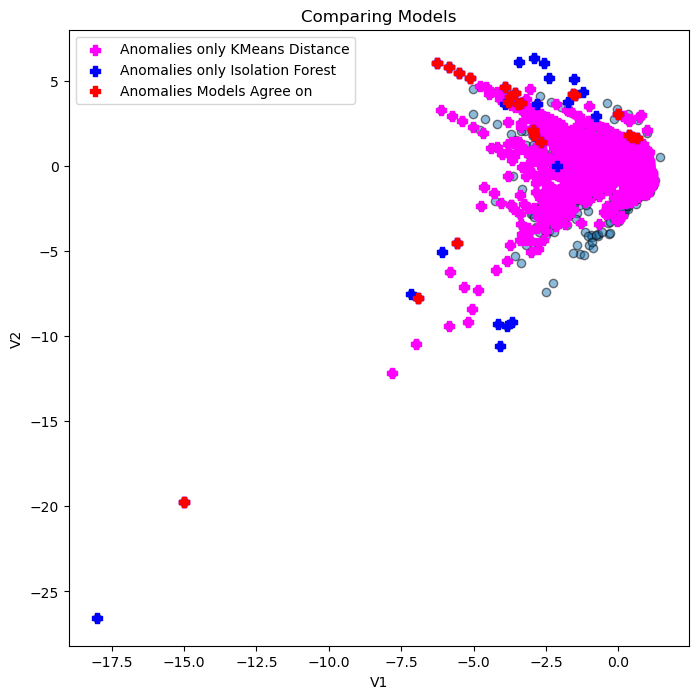

In [25]:
# Define anomalies identified by kmeans
kmeans_996_anomalies = df_scaled[df_scaled['cluster'] == 1]
# Define anomalies identified by isolation forest
iso_004_anomalies = df_scaled[df_scaled['anomaly_iso'] == 1]
# Define anomalies identified by both models
both_anomalies = df_scaled[(df_scaled['anomaly_iso'] == 1)& (df_scaled['cluster'] == 1)]
# Plot the data points and identified clusters
fig, ax= plt.subplots(figsize=(8, 8))
# Plot data
ax.scatter(df_scaled["V1"], df_scaled["V2"], ec = 'black', alpha=0.5)
ax.set_title("Comparing Models")
# Annotate KMeans anomalies
kmeans_996_anomalies.plot(x="V1", y="V2", kind="scatter", color="magenta", label="Anomalies only KMeans Distance", ax=ax, marker='P',s=50)
# Annotate Iso Forest anomalies
iso_004_anomalies.plot(x="V1", y="V2", kind="scatter", color="blue", label="Anomalies only Isolation Forest", ax=ax, marker='P',s=50)
# Annotate Anomolies identified by both models
both_anomalies.plot(x="V1", y="V2", kind="scatter", color="red", label="Anomalies Models Agree on", ax=ax, marker='P',s=50);

# PCA

In [28]:
df_scaled_pca = df_scaled.drop(columns=['cluster', 'anomaly_iso'])
df_scaled_pca.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,-1.133169,0.446834,-1.535047,-0.821518,1.645946,-0.517249,-0.133250,0.057508,0.585590,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,0.722785,1.551943,-0.315973,-0.686699,0.798096,0.541269,-0.466837,-0.205886,-0.093585,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,-0.124638,0.895884,-0.128068,-0.704557,2.539689,-3.258583,0.798958,-0.127804,-2.707713,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,-0.854378,0.969520,-0.300606,-0.802796,-0.492057,-1.184825,-1.055192,2.500622,-1.436230,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,-1.365765,1.205880,0.389505,-1.472671,0.329236,-0.495778,-0.593159,-0.023071,1.079111,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532


In [31]:
pca = PCA(n_components=3)

principal_components = pca.fit_transform(df_scaled_pca)

principal_components.head()

,pca0,pca1,pca2
0,2.237049,-0.933479,-0.850853
1,1.405848,0.576763,0.913372
2,2.361233,-1.548461,-0.787258
3,1.765155,-0.595945,0.272495
4,1.904697,-0.885590,-0.942569


In [26]:
# Make a list of anomolies identified in both methods
both = [a for a in df_scaled['anomaly_iso'] if a in df_scaled['cluster']]
both

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
